In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Set random seed for reproducibility
np.random.seed(42)

print("Libraries loaded successfully!")


Libraries loaded successfully!


In [2]:
# Define column names (UCI dataset has no header)
COLUMN_NAMES = [
    'age', 'workclass', 'fnlwgt', 'education', 'education-num',
    'marital-status', 'occupation', 'relationship', 'race', 'sex',
    'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
    'income'
]

# Load training data
df = pd.read_csv('../data/raw/adult_train.csv', 
                 header=None, 
                 names=COLUMN_NAMES,
                 skipinitialspace=True,
                 na_values='?')

print(f"Dataset shape: {df.shape}")
print(f"\nFirst 5 rows:")
df.head()


Dataset shape: (32561, 15)

First 5 rows:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
print("=== Dataset Overview ===\n")
print(f"Total records: {len(df):,}")
print(f"Total features: {len(df.columns)-1}")
print(f"Target variable: income\n")

print("\n=== Data Types ===")
print(df.dtypes)

print("\n=== Summary Statistics (Numeric Features) ===")
df.describe()


=== Dataset Overview ===

Total records: 32,561
Total features: 14
Target variable: income


=== Data Types ===
age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

=== Summary Statistics (Numeric Features) ===


,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


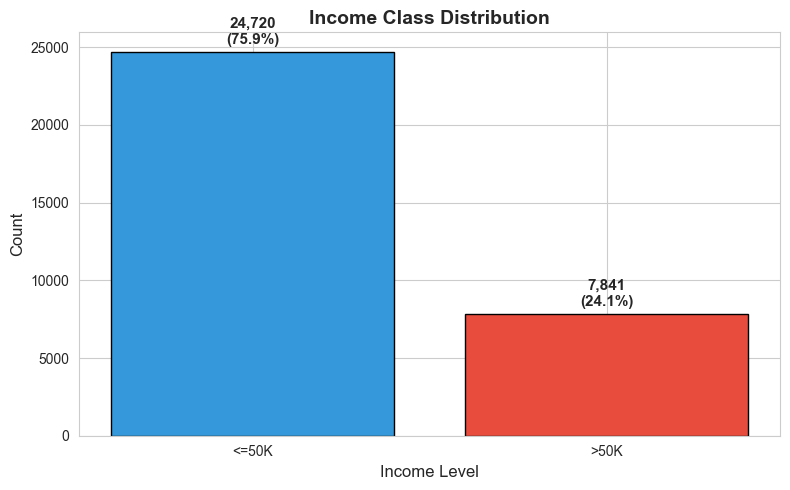


Class imbalance ratio: 3.15:1


In [4]:
# Target variable distribution
plt.figure(figsize=(8, 5))
income_counts = df['income'].value_counts()
colors = ['#3498db', '#e74c3c']

plt.bar(income_counts.index, income_counts.values, color=colors, edgecolor='black')
plt.title('Income Class Distribution', fontsize=14, fontweight='bold')
plt.xlabel('Income Level', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)

# Add count labels on bars
for i, (label, count) in enumerate(income_counts.items()):
    plt.text(i, count + 500, f'{count:,}\n({count/len(df)*100:.1f}%)', 
             ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.savefig('../docs/class_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"\nClass imbalance ratio: {income_counts.iloc[0]/income_counts.iloc[1]:.2f}:1")


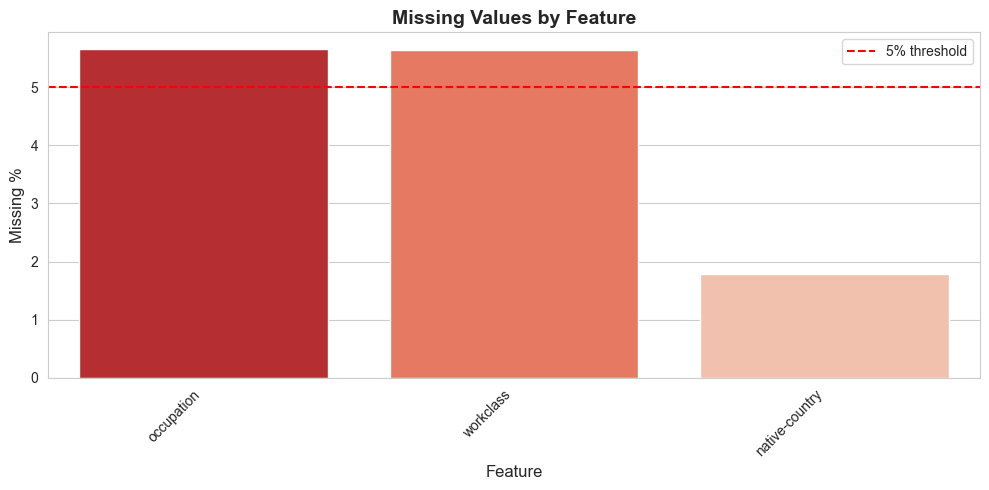


=== Missing Value Summary ===
          Feature  Missing %
0      occupation   5.660146
1       workclass   5.638647
2  native-country   1.790486

Total records with any missing value: 2,399


In [5]:
# Calculate missing percentages
missing_percent = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
missing_data = pd.DataFrame({
    'Feature': missing_percent.index,
    'Missing %': missing_percent.values
})
missing_data = missing_data[missing_data['Missing %'] > 0]

# Visualize
plt.figure(figsize=(10, 5))
sns.barplot(data=missing_data, x='Feature', y='Missing %', palette='Reds_r')
plt.title('Missing Values by Feature', fontsize=14, fontweight='bold')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Missing %', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.axhline(y=5, color='red', linestyle='--', label='5% threshold')
plt.legend()
plt.tight_layout()
plt.savefig('../docs/missing_values.png', dpi=300, bbox_inches='tight')
plt.show()

print("\n=== Missing Value Summary ===")
print(missing_data)
print(f"\nTotal records with any missing value: {df.isnull().any(axis=1).sum():,}")


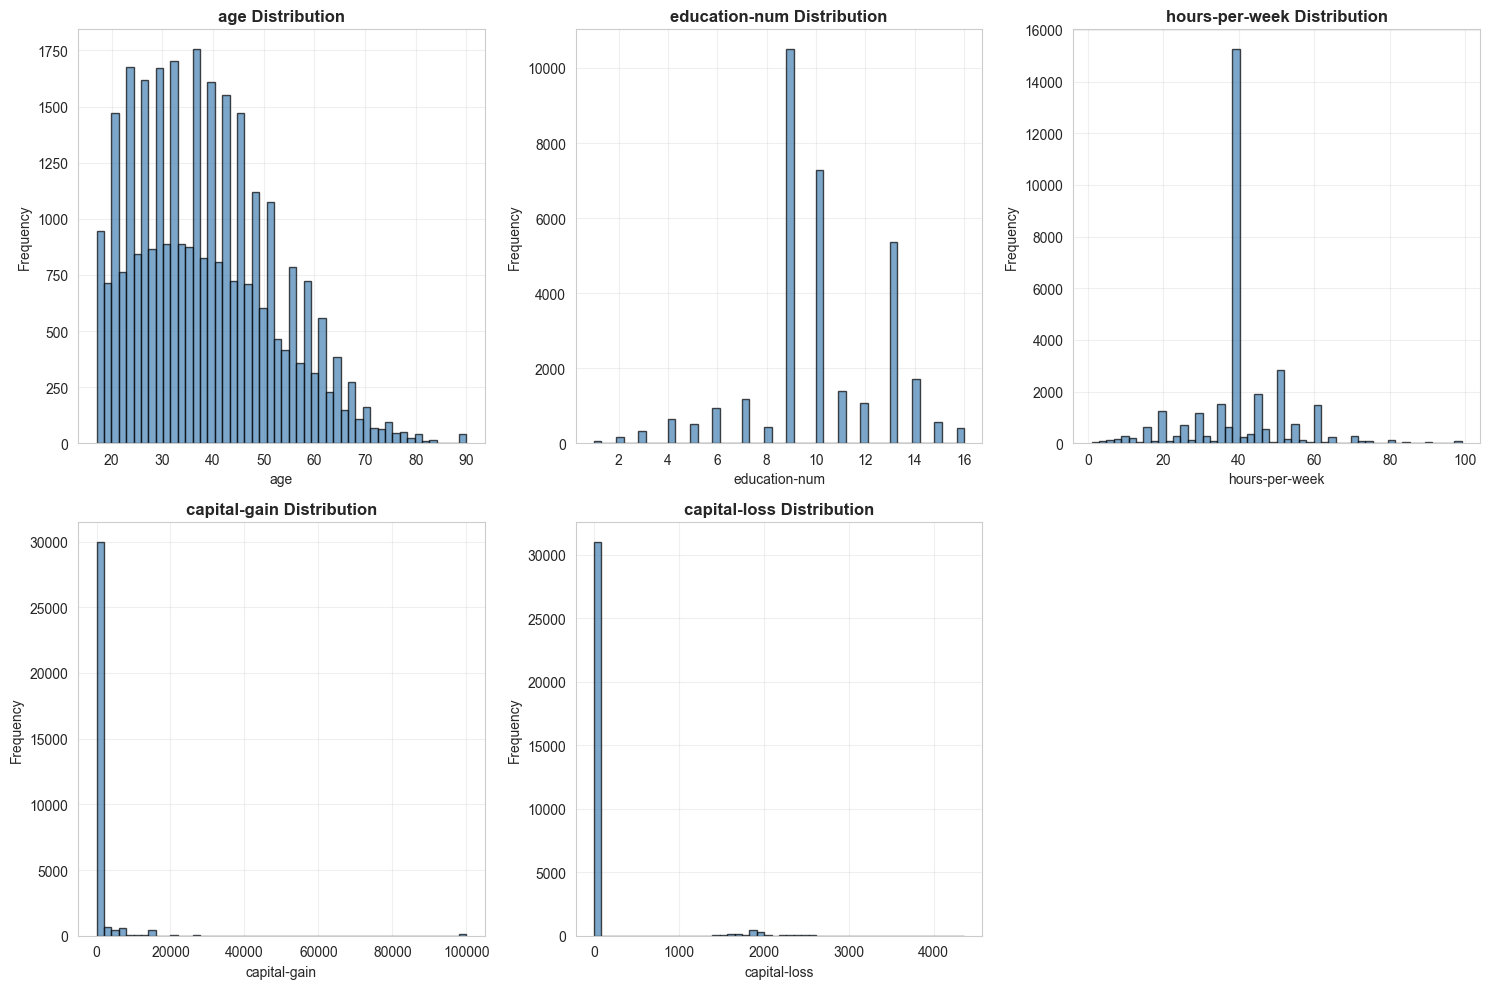


=== Numeric Feature Statistics ===

age:
  Mean: 38.58
  Median: 37.00
  Std: 13.64
  Skewness: 0.56

education-num:
  Mean: 10.08
  Median: 10.00
  Std: 2.57
  Skewness: -0.31

hours-per-week:
  Mean: 40.44
  Median: 40.00
  Std: 12.35
  Skewness: 0.23

capital-gain:
  Mean: 1077.65
  Median: 0.00
  Std: 7385.29
  Skewness: 11.95

capital-loss:
  Mean: 87.30
  Median: 0.00
  Std: 402.96
  Skewness: 4.59


In [6]:
# Select numeric features
numeric_features = ['age', 'education-num', 'hours-per-week', 'capital-gain', 'capital-loss']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, col in enumerate(numeric_features):
    axes[idx].hist(df[col], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].grid(alpha=0.3)

# Hide extra subplot
axes[-1].axis('off')

plt.tight_layout()
plt.savefig('../docs/numeric_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# Print statistics
print("\n=== Numeric Feature Statistics ===")
for col in numeric_features:
    print(f"\n{col}:")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")



=== Categorical Feature Cardinality ===
       Feature  Unique Values        Most Common Most Common %
     workclass              8            Private         69.7%
     education             16            HS-grad         32.3%
marital-status              7 Married-civ-spouse         46.0%
    occupation             14     Prof-specialty         12.7%
  relationship              6            Husband         40.5%
          race              5              White         85.4%
           sex              2               Male         66.9%
native-country             41      United-States         89.6%


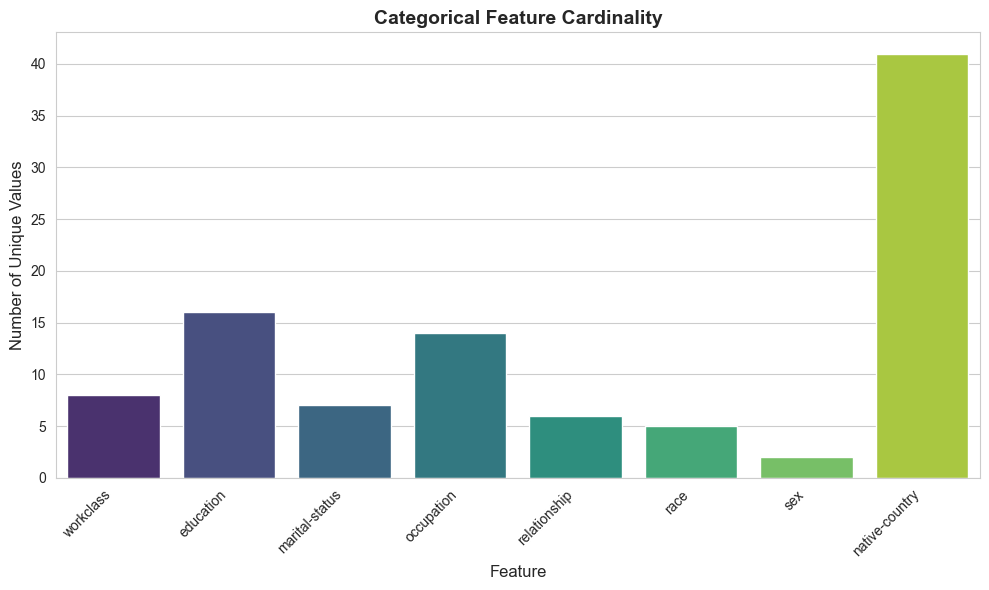

In [7]:
# Categorical features
categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 
                        'relationship', 'race', 'sex', 'native-country']

cardinality_data = []
for col in categorical_features:
    unique_count = df[col].nunique()
    most_common = df[col].mode()[0] if not df[col].mode().empty else 'N/A'
    most_common_pct = (df[col] == most_common).sum() / len(df) * 100
    cardinality_data.append({
        'Feature': col,
        'Unique Values': unique_count,
        'Most Common': most_common,
        'Most Common %': f'{most_common_pct:.1f}%'
    })

cardinality_df = pd.DataFrame(cardinality_data)
print("\n=== Categorical Feature Cardinality ===")
print(cardinality_df.to_string(index=False))

# Visualize
plt.figure(figsize=(10, 6))
sns.barplot(data=cardinality_df, x='Feature', y='Unique Values', palette='viridis')
plt.title('Categorical Feature Cardinality', fontsize=14, fontweight='bold')
plt.xlabel('Feature', fontsize=12)
plt.ylabel('Number of Unique Values', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('../docs/categorical_cardinality.png', dpi=300, bbox_inches='tight')
plt.show()


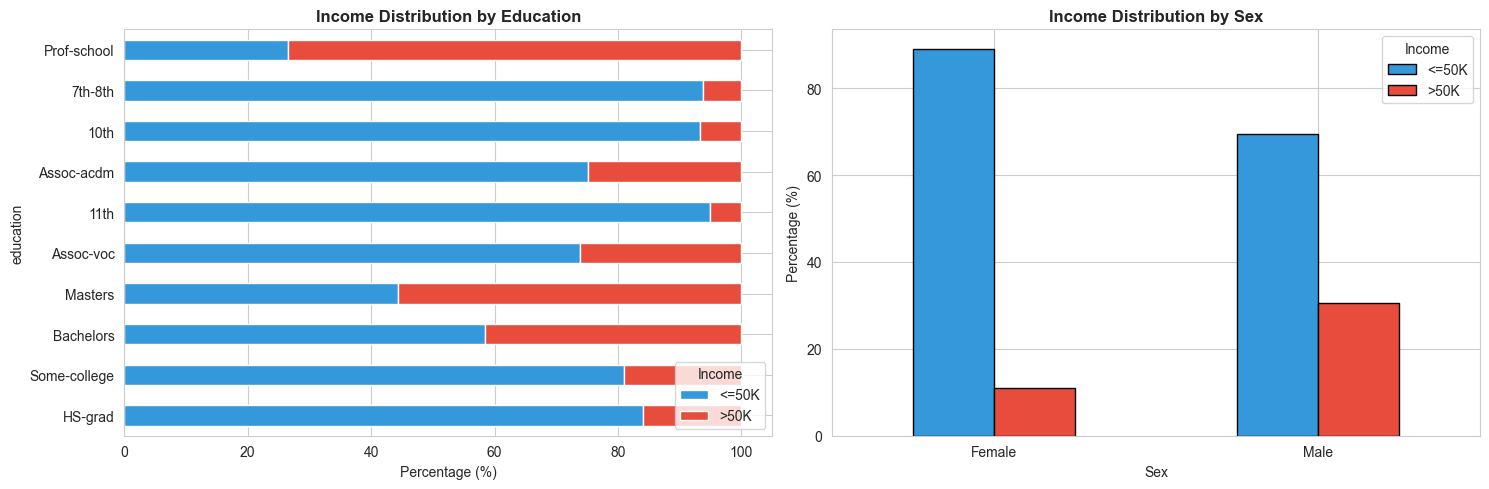

In [8]:
# Income distribution by education and sex
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# By education
education_income = pd.crosstab(df['education'], df['income'], normalize='index') * 100
top_education = df['education'].value_counts().head(10).index
education_income.loc[top_education].plot(kind='barh', stacked=True, ax=axes[0], 
                                          color=['#3498db', '#e74c3c'])
axes[0].set_title('Income Distribution by Education', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Percentage (%)', fontsize=10)
axes[0].legend(title='Income', loc='lower right')

# By sex
sex_income = pd.crosstab(df['sex'], df['income'], normalize='index') * 100
sex_income.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'], edgecolor='black')
axes[1].set_title('Income Distribution by Sex', fontsize=12, fontweight='bold')
axes[1].set_xlabel('Sex', fontsize=10)
axes[1].set_ylabel('Percentage (%)', fontsize=10)
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=0)
axes[1].legend(title='Income')

plt.tight_layout()
plt.savefig('../docs/income_by_features.png', dpi=300, bbox_inches='tight')
plt.show()


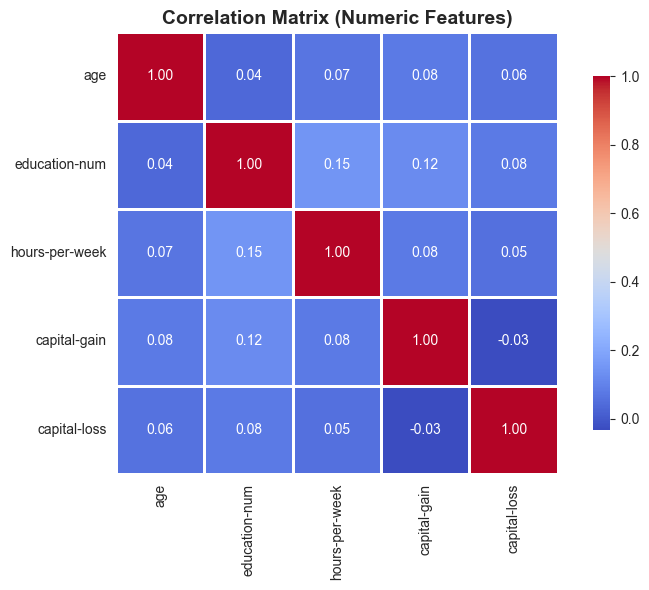

In [9]:
# Correlation for numeric features
numeric_cols = df[numeric_features].copy()
corr_matrix = numeric_cols.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=1, cbar_kws={'shrink': 0.8})
plt.title('Correlation Matrix (Numeric Features)', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('../docs/correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()


In [10]:
print("\n" + "="*60)
print(" KEY EDA INSIGHTS FOR MILESTONE REPORT")
print("="*60)

print("\n1. DATA QUALITY:")
print(f"   - Total records: {len(df):,}")
print(f"   - Missing values primarily in: workclass, occupation, native-country")
print(f"   - Records with missing data: {df.isnull().any(axis=1).sum():,} ({df.isnull().any(axis=1).sum()/len(df)*100:.1f}%)")

print("\n2. CLASS BALANCE:")
income_dist = df['income'].value_counts()
print(f"   - ≤50K: {income_dist.iloc[0]:,} ({income_dist.iloc[0]/len(df)*100:.1f}%)")
print(f"   - >50K: {income_dist.iloc[1]:,} ({income_dist.iloc[1]/len(df)*100:.1f}%)")
print(f"   - Imbalance ratio: {income_dist.iloc[0]/income_dist.iloc[1]:.2f}:1")

print("\n3. FEATURE CHARACTERISTICS:")
print(f"   - Categorical features: {len(categorical_features)}")
print(f"   - High cardinality: native-country (41 values), occupation (15 values)")
print(f"   - Numeric features: {len(numeric_features)}")
print(f"   - Highly skewed: capital-gain, capital-loss (many zeros)")

print("\n4. PREPROCESSING NEEDS:")
print("   - Handle missing values with imputation")
print("   - One-hot encode categorical features (watch dimensionality)")
print("   - Scale numeric features (different ranges)")
print("   - Address capital-gain/loss skewness")
print("   - Use stratified sampling for train/val/test splits")

print("\n" + "="*60)



 KEY EDA INSIGHTS FOR MILESTONE REPORT

1. DATA QUALITY:
   - Total records: 32,561
   - Missing values primarily in: workclass, occupation, native-country
   - Records with missing data: 2,399 (7.4%)

2. CLASS BALANCE:
   - ≤50K: 24,720 (75.9%)
   - >50K: 7,841 (24.1%)
   - Imbalance ratio: 3.15:1

3. FEATURE CHARACTERISTICS:
   - Categorical features: 8
   - High cardinality: native-country (41 values), occupation (15 values)
   - Numeric features: 5
   - Highly skewed: capital-gain, capital-loss (many zeros)

4. PREPROCESSING NEEDS:
   - Handle missing values with imputation
   - One-hot encode categorical features (watch dimensionality)
   - Scale numeric features (different ranges)
   - Address capital-gain/loss skewness
   - Use stratified sampling for train/val/test splits

